In [1]:
import sys
sys.path.append("/home/ly/workspace/mmsa")
seed = 1000003
import numpy as np
import torch
from torch import nn
from torch import optim

np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
from models.bigru_rcnn_gate import *
from utils.train import *
from typing import *
from collections import Counter

from utils.load_raw_yelp import *
from utils.dataset import *
from utils.train import *
config

{'task': 'CLS',
 'embedding_dim': 100,
 'embedding': None,
 'freeze_embedding': True,
 'text_hidden_size': 100,
 'text_layers': 1,
 'bias_init': 1.0,
 'img_input_size': 2048,
 'img_output_size': 100,
 'img_num': 3,
 'output_size': 5,
 'uniform_bound': 0.1,
 'dropout': 0.5}

In [2]:
%%time
batch_size = 64
workers = 4
train_set, valid_set, test_set= load_glove_data(config)
train_loader, valid_loader, test_loader = get_yelp_raw_loader(batch_size, workers, get_collate_fn(config), train_set, valid_set, test_set)
model = Model(config).cuda()
loss = nn.CrossEntropyLoss()
print(get_parameter_number(model))

_interval = 5
lr = 1e-3
epoches = 50
stoping_step = 5
optimizer = get_regal_optimizer(model, optim.AdamW, lr)

viz = get_Visdom()
batch_loss_drawer = VisdomScalar(viz, f"batch_loss interval:{_interval}")
epoch_loss_drawer = VisdomScalar(viz, f"Train and valid loss", 2)
acc_drawer = VisdomScalar(viz, "Train and valid accuracy", 2)
text_writer = VisdomTextWriter(viz, "Training")

batch_loss = []
train_loss = []
valid_loss = []
train_acc = []
valid_acc = []

res, model = train_visdom_v2(model, optimizer, loss, viz, train_loader,
                          valid_loader, epoches, batch_loss, batch_loss_drawer,
                          train_loss, valid_loss, epoch_loss_drawer,
                          train_acc, valid_acc, acc_drawer, text_writer,
                         _interval=_interval, early_stop=stoping_step)

eval_model_on_raw_yelp(model, loss, test_loader)

/home/ly/miniconda3/envs/torch1.7/lib/python3.8/site-packages/torch/nn/modules/rnn.py:58: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
Setting up a new session...


{'Total': 4910705, 'Trainable': 692405}


No 1 epoch: 554it [01:12,  7.69it/s]
No 2 epoch: 554it [01:12,  7.60it/s]
No 3 epoch: 554it [01:12,  7.64it/s]
No 4 epoch: 554it [01:11,  7.76it/s]
No 5 epoch: 554it [01:12,  7.64it/s]
No 6 epoch: 554it [01:13,  7.54it/s]
No 7 epoch: 554it [01:12,  7.62it/s]
No 8 epoch: 554it [01:12,  7.63it/s]
No 9 epoch: 554it [01:12,  7.63it/s]
No 10 epoch: 554it [01:13,  7.55it/s]
No 11 epoch: 554it [01:13,  7.55it/s]
No 12 epoch: 554it [01:13,  7.54it/s]
No 13 epoch: 554it [01:12,  7.62it/s]
No 14 epoch: 554it [01:13,  7.57it/s]
No 15 epoch: 554it [01:12,  7.68it/s]
No 16 epoch: 554it [01:13,  7.57it/s]
No 17 epoch: 554it [01:14,  7.42it/s]
/home/ly/miniconda3/envs/torch1.7/lib/python3.8/site-packages/torch/nn/modules/rnn.py:742: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at  /opt/conda/conda-

CPU times: user 14min 43s, sys: 4min 29s, total: 19min 13s
Wall time: 22min 13s


{'Boston': {'Accuracy': 0.5873015873015873,
  'F1': 0.5801195089110711,
  'Loss': 0.9405322759870499},
 'Chicago': {'Accuracy': 0.5753846153846154,
  'F1': 0.5669886885352521,
  'Loss': 0.9681329430066622},
 'Los Angeles': {'Accuracy': 0.5764075067024129,
  'F1': 0.5742696762056606,
  'Loss': 0.9851420507993519},
 'New York': {'Accuracy': 0.5784256559766764,
  'F1': 0.5736193425727077,
  'Loss': 0.9718162291946634},
 'San Francisco': {'Accuracy': 0.5631578947368421,
  'F1': 0.5617866027533293,
  'Loss': 0.9866158564885458},
 'Total': {'Accuracy': 0.5762584522915102,
  'F1': 0.5730051569471628,
  'Loss': 0.9788920502121694}}

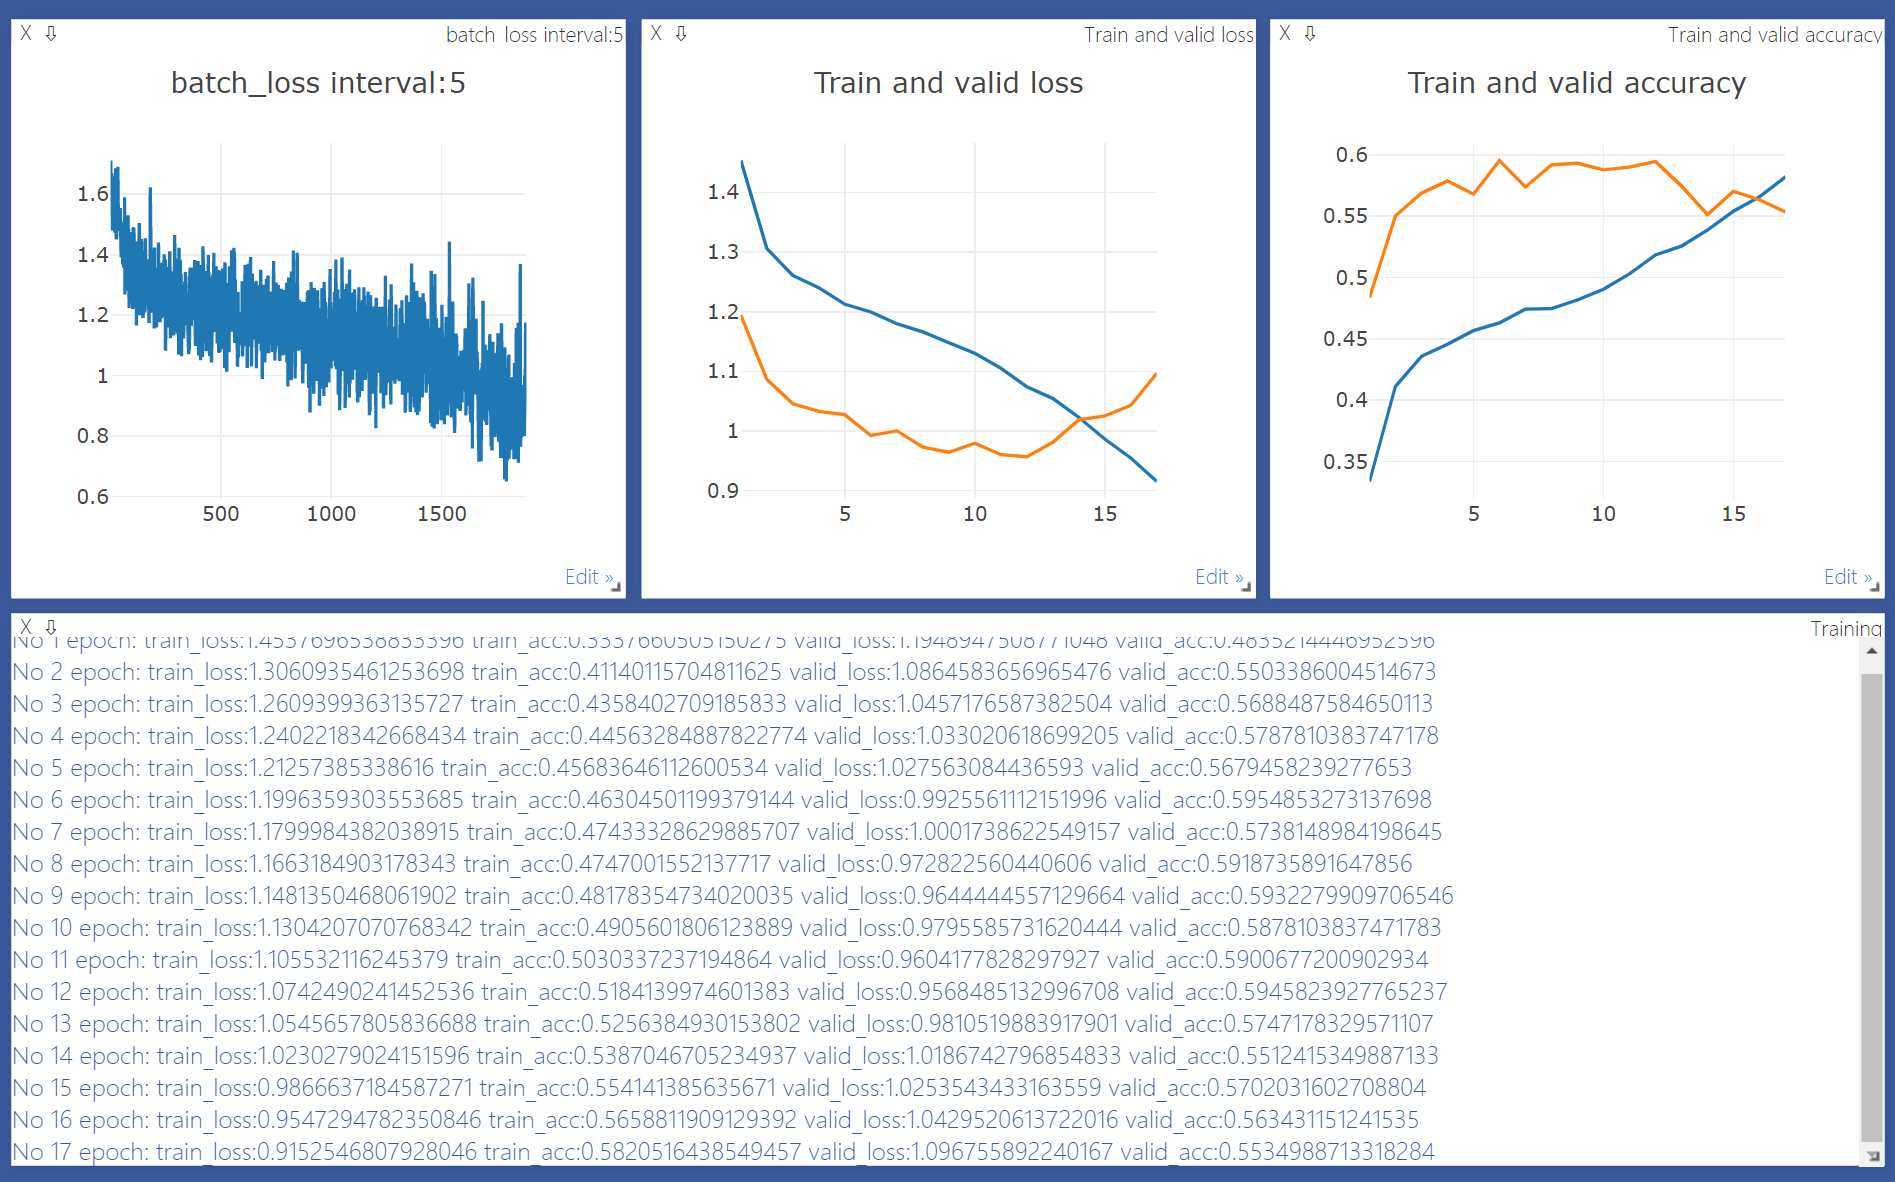